In [3]:
!pip install bs4
!pip install requests

In [4]:
#Importing the Required Libraries
from bs4 import BeautifulSoup
import requests

In [5]:
page = requests.get('https://en.wikipedia.org/wiki/Main_Page')

In [6]:
page

<Response [200]>

In [7]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ec4aa45b-8e48-44da-a429-73ad6f43659b","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Main_Page","wgTitle":"Main Page","wgCurRevisionId":1004593520,"wgRevisionId":1004593520,"wgArticleId":15580374,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Main_Page","wgRelevantArticleId":15580374,"wgIsProbablyEditable":fals

Scraping all the header tags

In [9]:
headers=[]
for i in soup.find_all('h2', class_="mp-h2"):
    headers.append(i.text)
headers   

["From today's featured article",
 'Did you know\xa0...',
 'In the news',
 'On this day',
 "Today's featured picture",
 'Other areas of Wikipedia',
 "Wikipedia's sister projects",
 'Wikipedia languages']

#Q3. Pythone program to display IMDB's Top rated 100 Indian movies' data(i.e name,rating,year of release) and make data frame


In [10]:
#sending request to the webpage server to get the source code of the page
page = requests.get('https://www.imdb.com/india/top-rated-indian-movies')
page

<Response [200]>

In [11]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<style>
                body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
            </style>
<style>
            body#styleguide-v2 #root {
                box-shadow: none;
            }
        </style>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top Rated Indian Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitl

In [12]:
555                      

555

In [13]:
names = []
years = []
rates = []
ranks = []
moviesnm=soup.find('tbody',class_="lister-list").find_all('tr')
for i in moviesnm:
    name = i.find('td', class_="titleColumn").a.text
    names.append(name)
    rank = i.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    ranks.append(rank)
    year = i.find('td', class_="titleColumn").span.text.strip('()')
    years.append(year)
    rating = i.find('td', class_="ratingColumn imdbRating")
    rates.append(rating.text.strip())

import pandas as pd
df1 = pd.DataFrame(index = ranks)
df1['Name'] = names
df1['Year'] = years
df1['Rate'] = rates
df1.head(100)

,Name,Year,Rate
1,Jai Bhim,2021,8.6
2,Nayakan,1987,8.5
3,Pariyerum Perumal,2018,8.5
4,Anbe Sivam,2003,8.5
5,C/o Kancharapalem,2018,8.5
...,...,...,...
96,Munna Bhai M.B.B.S.,2003,8.1
97,Sarfarosh,1999,8.1
98,Queen,2013,8.1
99,Roja,1992,8.1


In [14]:
tables = soup.find_all('table')
moviesName = []
moviesYear = []
moviesRate = []

for table in tables:
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        
        if len(cells) > 1:
            movieName = cells[0]
            moviesName.append(movieName.text.strip())
            
            movieYear = cells[1]
            moviesYear.append(movieYear.text.strip())
            
            movieRate = cells[2]
            moviesRate.append(movieRate.text.strip())
            
import pandas as pd

df1 = pd.DataFrame(moviesYear, index = moviesName, columns = ['Year'])
df1['Rate'] = moviesRate
df1.head(100)


,Year,Rate
,1.\n Jai Bhim\n(2021),8.6
,2.\n Nayakan\n(1987),8.5
,3.\n Pariyerum Perumal\n(2018),8.5
,4.\n Anbe Sivam\n(2003),8.5
,5.\n C/o Kancharapalem\n(2018),8.5
...,...,...
,96.\n Munna Bhai M.B.B.S.\n(2003),8.1
,97.\n Sarfarosh\n(1999),8.1
,98.\n Queen\n(2013),8.1
,99.\n Roja\n(1992),8.1


Q2.#Python program to display IMDB’s Top rated 100 movies’ data (i.e. name, rating, year of release)
 and make dataframe.

In [15]:
#sending request to the webpage server to get the source code of the page
page = requests.get('https://www.imdb.com/search/title/?groups=top_250&sort=user_rating')
page

<Response [200]>

In [16]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb "Top 250"
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?groups=top_250" rel="canonical"/>
<meta content="http://ww

In [32]:
movies=[]
for i in soup.find_all('h1',class_="header"):      
    movies.append(i.h1.get_text()) 
    
movies  

[]

In [18]:
names = []
years = []
rates = []
ranks = []
for i in soup.find_all('h3',class_="lister-item-header"):      
    names.append(i.a.get_text())
for i in soup.find_all('span', class_="lister-item-index unbold text-primary"):
    ranks.append(i.get_text(strip=True).split('.')[0])
for i in soup.find_all('span', class_="lister-item-year text-muted unbold"):
    years.append(i.text.strip('()'))
for i in soup.find_all('div', class_="inline-block ratings-imdb-rating"):
    rates.append(i.text.strip())

import pandas as pd
df1 = pd.DataFrame(index = ranks)
df1['Name'] = names
df1['Year'] = years
df1['Rate'] = rates
df1.head(50)

,Name,Year,Rate
1,Jai Bhim,2021,9.5
2,The Shawshank Redemption,1994,9.3
3,The Godfather,1972,9.2
4,The Dark Knight,2008,9.0
5,The Godfather: Part II,1974,9.0
6,12 Angry Men,1957,9.0
7,The Lord of the Rings: The Return of the King,2003,8.9
8,Pulp Fiction,1994,8.9
9,Schindler's List,1993,8.9
10,Inception,2010,8.8


In [19]:
#next 50 cells
#sending request to the webpage server to get the source code of the page
page = requests.get('https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&view=advanced')
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb "Top 250"
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?groups=top_250&amp;start=51" rel="canonical"/>
<meta conte

In [20]:
#next 50 movies
names = []
years = []
rates = []
ranks = []
for i in soup.find_all('h3',class_="lister-item-header"):      
    names.append(i.a.get_text())
for i in soup.find_all('span', class_="lister-item-index unbold text-primary"):
    ranks.append(i.get_text(strip=True).split('.')[0])
for i in soup.find_all('span', class_="lister-item-year text-muted unbold"):
    years.append(i.text.strip('()'))
for i in soup.find_all('div', class_="inline-block ratings-imdb-rating"):
    rates.append(i.text.strip())

import pandas as pd
df2 = pd.DataFrame(index = ranks)
df2['Name'] = names
df2['Year'] = years
df2['Rate'] = rates
df3=df1.append([df2])
df3 # 100 top movies

,Name,Year,Rate
1,Jai Bhim,2021,9.5
2,The Shawshank Redemption,1994,9.3
3,The Godfather,1972,9.2
4,The Dark Knight,2008,9.0
5,The Godfather: Part II,1974,9.0
...,...,...,...
96,Bacheha-Ye aseman,1997,8.3
97,Toy Story,1995,8.3
98,Braveheart,1995,8.3
99,Reservoir Dogs,1992,8.3


Q8#Python program to scrape mentioned details from dineout.co.in 

In [21]:
page = requests.get('https://www.dineout.co.in/bangalore-restaurants/buffet-special')
page

<Response [200]>

In [22]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><style type="text/css">
            @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{
        

Scraping restaurants name

In [23]:
titles = []

for i in soup.find_all('div',class_="restnt-info cursor"):
    titles.append(i.text)
    
titles

['QuattroThe Leela Bhartiya City,Nagawara, North Bangalore',
 "Dino's BBQ and GrillWhitefield, East Bangalore"]

Scraping locations

In [24]:
location = []

for i in soup.find_all('div',class_="restnt-loc ellipsis"):
    location.append(i.text)
    
location

['The Leela Bhartiya City,Nagawara, North Bangalore',
 'Whitefield, East Bangalore']

Scraping first ratings

In [25]:
rating = []

for i in soup.find_all('div',class_="restnt-rating rating-4"):
    rating.append(i.text)
    
rating    

['4.4', '4.2']

Scraping  Image URL

In [26]:
images = []
for i in soup.find_all('div',class_="img cursor"):
    images.append(i)
images  


[<div analytics-action="RestaurantImageClick" analytics-label="98007_Quattro" class="img cursor" data-link="/bangalore/quattro-nagawara-north-bangalore-98007" data-w-onclick="cardClickHandler|w1-restarant"><img alt="Quattro" class="lazy-load-img no-img" data-gatype="RestaurantImageClick" data-src="https://im1.dineout.co.in/images/uploads/restaurant/sharpen/9/h/v/p98007-1633695971616038e3ba215.jpg?tr=tr:n-medium" data-url="/bangalore/quattro-nagawara-north-bangalore-98007" data-w-onclick="cardClickHandler"/></div>,
 <div analytics-action="RestaurantImageClick" analytics-label="98071_Dino's BBQ and Grill" class="img cursor" data-link="/bangalore/dinos-bbq-and-grill-whitefield-east-bangalore-98071" data-w-onclick="cardClickHandler|w1-restarant"><img alt="Dino's BBQ and Grill" class="lazy-load-img no-img" data-gatype="RestaurantImageClick" data-src="https://im1.dineout.co.in/images/uploads/restaurant/sharpen/9/e/k/p98071-16363485016188b255e5e97.jpg?tr=tr:n-medium" data-url="/bangalore/dino

Q4)#Python program to scrape cricket rankings from icc-cricket.com. You have to scrape:
a) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.

In [27]:
#sending request to the webpage server to get the source code of the page
page=requests.get('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')
page

<Response [200]>

In [28]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Ranking for ODI teams International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Ranking for ODI teams International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cr

In [29]:
odidata=[]
teams=[]
matchPoint=[]
matches= []
points = []
ratings = []
ranks = []
for i in soup.find_all('div', class_="rankings-block__container full rankings-table"):
    odidata.append(i.get_text().strip())

for i in soup.find_all('span', class_="u-hide-phablet"):
    if i.get_text()!='':
        teams.append(i.get_text().strip(''))

for i in soup.find_all('td', class_="rankings-block__banner--matches"):
    matchPoint.extend(i.get_text().split())
for i in soup.find_all('td', class_="rankings-block__banner--points"):
    matchPoint.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell u-center-text"):
    matchPoint.append(i.get_text())
for i in range(0,len(matchPoint),2):
    matches.append(matchPoint[i])
    points.append(matchPoint[i+1])
    
for i in soup.find_all('td', class_="rankings-block__banner--rating u-text-right"):
    ratings.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell u-text-right rating"):
    ratings.append(i.get_text())

for i in soup.find_all('td', class_="rankings-block__banner--pos"):
    ranks.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell table-body__cell--position u-text-right"):
    ranks.append(i.get_text())   
    
import pandas as pd
df = pd.DataFrame(index = ranks)
df['TEAM'] = teams
df['MATCHES']=matches
df['POINTS']=points
df['RATING']=ratings
df.head(10)

,TEAM,MATCHES,POINTS,RATING
1,New Zealand,17,"2,054",121
2,England,32,"3,793",119
3,Australia,28,"3,244",116
4,India,32,"3,624",113
5,South Africa,25,"2,459",98
6,Pakistan,27,"2,524",93
7,Bangladesh,30,"2,740",91
8,West Indies,30,"2,523",84
9,Sri Lanka,32,"2,657",83
10,Afghanistan,17,"1,054",62


#(b) Top 10 ODI Batsmen in men along with the records of their team and rating.

In [ ]:
page=requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/o

In [37]:
page

<Response [200]>

In [41]:
 page=requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi/batting')
soup = BeautifulSoup(page.content)
teams=[]
batsmen= []
ratings = []
ranks = []
for i in soup.find_all('div', class_="rankings-block__banner--name-large"):
    batsmen.append(i.get_text().strip(''))
for i in soup.find_all('td', class_="table-body__cell rankings-table__name name"):
    batsmen.append(i.get_text().strip('\n'))

for i in soup.find_all('div', class_="rankings-block__banner--nationality"):
    teams.append(i.get_text().strip('\n    '))
for i in soup.find_all('span', class_="table-body__logo-text"):
    teams.append(i.get_text().strip())

for i in soup.find_all('div', class_="rankings-block__banner--rating"):
    ratings.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell rating"):
    ratings.append(i.get_text())

for i in soup.find_all('span', class_="rankings-block__pos-number"):
    ranks.extend(i.get_text().split())
for i in soup.find_all('span', class_="rankings-table__pos-number"):
    ranks.append(i.get_text().split()[0]) 

df = pd.DataFrame(index = ranks)
df['PLAYER']=batsmen
df['TEAM'] = teams
df['RATING']=ratings
df.head(10)

,PLAYER,TEAM,RATING
1,Babar Azam,PAK,873
2,Virat Kohli,IND,844
3,Rohit Sharma,IND,813
4,Ross Taylor,NZ,801
5,Aaron Finch,AUS,779
6,Jonny Bairstow,ENG,775
7,David Warner,AUS,762
8,Shai Hope,WI,758
9,Kane Williamson,NZ,754
10,Quinton de Kock,SA,743


#c)Top 10 ODI bowlers along with the records of their team and ratings

In [40]:
page=requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi/bowling')
soup = BeautifulSoup(page.content)
teams=[]
bowlers= []
ratings = []
ranks = []
for i in soup.find_all('div', class_="rankings-block__banner--name-large"):
    bowlers.append(i.get_text().strip(''))
for i in soup.find_all('td', class_="table-body__cell rankings-table__name name"):
    bowlers.append(i.get_text().strip('\n'))

for i in soup.find_all('div', class_="rankings-block__banner--nationality"):
    teams.append(i.get_text().strip('\n    '))
for i in soup.find_all('span', class_="table-body__logo-text"):
    teams.append(i.get_text().strip())
    
for i in soup.find_all('div', class_="rankings-block__banner--rating"):
    ratings.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell rating"):
    ratings.append(i.get_text())

for i in soup.find_all('span', class_="rankings-block__pos-number"):
    ranks.extend(i.get_text().split())
for i in soup.find_all('span', class_="rankings-table__pos-number"):
    ranks.append(i.get_text().split()[0])
    
df = pd.DataFrame(index = ranks)
df['PLAYER']=bowlers
df['TEAM'] = teams
df['RATING']=ratings
df.head(10)

,PLAYER,TEAM,RATING
1,Trent Boult,NZ,737
2,Josh Hazlewood,AUS,709
3,Mujeeb Ur Rahman,AFG,708
4,Chris Woakes,ENG,700
5,Mehedi Hasan,BAN,692
6,Matt Henry,NZ,691
7,Jasprit Bumrah,IND,679
8,Mitchell Starc,AUS,652
9,Shakib Al Hasan,BAN,650
10,Kagiso Rabada,SA,643


Q5.Python program to scrap cricket rankings from icc-cricket.com

a)Top 10 ODI teams in women's cricket along with the records for matches,points and ratings

In [42]:
page=requests.get('https://www.icc-cricket.com/rankings/womens/team-rankings/odi')
soup = BeautifulSoup(page.content)

teams=[]
matchPoint=[]
matches= []
points = []
ratings = []
ranks = []

for i in soup.find_all('span', class_="u-hide-phablet"):
    if i.get_text()!='':
        teams.append(i.get_text().strip(''))

for i in soup.find_all('td', class_="rankings-block__banner--matches"):
    matchPoint.extend(i.get_text().split())
for i in soup.find_all('td', class_="rankings-block__banner--points"):
    matchPoint.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell u-center-text"):
    matchPoint.append(i.get_text())
for i in range(0,len(matchPoint),2):
    matches.append(matchPoint[i])
    points.append(matchPoint[i+1])
    
for i in soup.find_all('td', class_="rankings-block__banner--rating u-text-right"):
    ratings.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell u-text-right rating"):
    ratings.append(i.get_text())

for i in soup.find_all('td', class_="rankings-block__banner--pos"):
    ranks.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell table-body__cell--position u-text-right"):
    ranks.append(i.get_text())   

df = pd.DataFrame(index = ranks)
df['TEAM'] = teams
df['MATCHES']=matches
df['POINTS']=points
df['RATING']=ratings
df.head(10)

,TEAM,MATCHES,POINTS,RATING
1,Australia,17,"2,746",162
2,South Africa,19,"2,307",121
3,England,18,"2,148",119
4,India,17,"1,899",112
5,Bangladesh,5,475,95
6,New Zealand,19,"1,668",88
7,West Indies,19,"1,658",87
8,Pakistan,18,"1,226",68
9,Ireland,5,240,48
10,Sri Lanka,5,233,47


b)Top 10 women's ODI players along with the records of their team and rating

In [43]:
page=requests.get('https://www.icc-cricket.com/rankings/womens/player-rankings/odi/batting')
soup = BeautifulSoup(page.content)

teams=[]
players= []
ratings = []
ranks = []
for i in soup.find_all('div', class_="rankings-block__banner--name-large"):
    players.append(i.get_text().strip(''))
for i in soup.find_all('td', class_="table-body__cell rankings-table__name name"):
    players.append(i.get_text().strip('\n'))

for i in soup.find_all('div', class_="rankings-block__banner--nationality"):
    teams.append(i.get_text().strip())
for i in soup.find_all('span', class_="table-body__logo-text"):
    teams.append(i.get_text().strip())
    
for i in soup.find_all('div', class_="rankings-block__banner--rating"):
    ratings.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell rating"):
    ratings.append(i.get_text())

for i in soup.find_all('span', class_="rankings-block__pos-number"):
    ranks.extend(i.get_text().split())
for i in soup.find_all('span', class_="rankings-table__pos-number"):
    ranks.append(i.get_text().split()[0]) 
    
df = pd.DataFrame(index = ranks)
df['PLAYER']=players
df['TEAM'] = teams
df['RATING']=ratings
df.head(10)

,PLAYER,TEAM,RATING
1,Lizelle Lee,SA,761
2,Alyssa Healy,AUS,750
3,Mithali Raj,IND,738
4,Tammy Beaumont,ENG,728
5,Amy Satterthwaite,NZ,717
6,Smriti Mandhana,IND,710
7,Meg Lanning,AUS,699
8,Beth Mooney,AUS,690
9,Stafanie Taylor,WI,676
10,Heather Knight,ENG,674


c)Top 10 women's ODI all-rounder along with the records of their team and rating

In [31]:
page=requests.get('https://www.icc-cricket.com/rankings/womens/player-rankings/odi/all-rounder')
page
soup = BeautifulSoup(page.content)
soup

teams=[]
player= []
ratings = []
ranks = []
for i in soup.find_all('div', class_="rankings-block__container full"):
    player.append(i.get_text().strip(''))
for i in soup.find_all('td', class_="table-head__cell"):
    player.append(i.get_text().strip('\n'))

for i in soup.find_all('div', class_="rankings-block__banner--nationality"):
    teams.append(i.get_text().strip())
for i in soup.find_all('span', class_="table-body__logo-text"):
    teams.append(i.get_text().strip())
    
for i in soup.find_all('div', class_="rankings-block__banner--rating"):
    ratings.extend(i.get_text().split())
for i in soup.find_all('td', class_="table-body__cell rating"):
    ratings.append(i.get_text())

for i in soup.find_all('span', class_="rankings-block__pos-number"):
    ranks.extend(i.get_text().split())
for i in soup.find_all('span', class_="rankings-table__pos-number"):
    ranks.append(i.get_text().split()[0]) 
    
df = pd.DataFrame
df['PLAYER']=all-rounder
df['TEAM'] = teams
df['RATING']=ratings
df.head(10)

NameError: name 'rounder' is not defined

Q10# python program to scrape monument name, monument description, image URL about top 10 monuments
from puredestinations.co.uk.

In [25]:
#Importing the Required Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [27]:
url='https://www.puredestinations.co.uk/top-10-famous-monuments-to-visit-in-india'
reqs=requests.get(url)
soup = BeautifulSoup(reqs.text,'html.parser')

In [29]:
names = []
description = []
im_url = []

titles = []
allP = soup.find_all('p')

for indx,name in enumerate(allP):
    local = name.find('strong')
    if len(str(local))!=4:
        if indx!=34:
            names.append(name.find('strong').text)
            index=indx
            local=allP[index+1]
            description.append(local.text)
            local2=allP[index+2]
            im_url.append(local2.find('img')['data-src'])
            
df=pd.DataFrame()
df['NAME']= names
df['DESCRIPTION']= description
df['IMAGE URL']= im_url
df.head(10)

,NAME,DESCRIPTION,IMAGE URL
0,"Taj Mahal, Agra","Enlisted in the Seven Wonders of the World, Th...",http://www.puredestinations.co.uk/wp-content/u...
1,"Golden Temple (Harmandir Sahib), Amritsar",The holiest shrine and pilgrimage place locate...,http://www.puredestinations.co.uk/wp-content/u...
2,"Meenakshi Temple, Madurai",Meenakshi Temple is situated on the Southern b...,http://www.puredestinations.co.uk/wp-content/u...
3,"Mysore Palace, Mysore",The Mysore Palace is a famous historical monum...,http://www.puredestinations.co.uk/wp-content/u...
4,"Gateway of India, Mumbai",Even though Mumbai is famous for its Bollywood...,http://www.puredestinations.co.uk/wp-content/u...
5,"Red Fort, New Delhi","Declared as the UNESCO’s World Heritage Site, ...",http://www.puredestinations.co.uk/wp-content/u...
6,"Hawa Mahal, Jaipur",Explore a blend of beauty and Rajasthan cultur...,http://www.puredestinations.co.uk/wp-content/u...
7,"Qutub Minar, New Delhi",Discover one of the tallest towers in the worl...,http://www.puredestinations.co.uk/wp-content/u...
8,"Sanchi Stupa, Sanchi","The beautiful and massive dome, Sanchi Stupa a...",http://www.puredestinations.co.uk/wp-content/u...
9,"Charminar, Hyderabad",No visit to Hyderabad should be complete witho...,http://www.puredestinations.co.uk/wp-content/u...


Q6.Python program to scrape details of all the posts from coreyms.com. Scrape the heading, date, content
and the code for the video from the link for the youtube video from the post.

In [15]:
#Importing the Required Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [16]:
page = requests.get('https://coreyms.com/')
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- This site is optimized with the Yoast SEO plugin v15.4 - https://yoast.com/wordpress/plugins/seo/ -->
<title>CoreyMS - Development, Design, DIY, and more</title>
<meta content="Development, Design, DIY, and more" name="description"/>
<meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
<link href="https://coreyms.com/" rel="canonical"/>
<link href="https://coreyms.com/page/2" rel="next"/>
<meta content="en_US" property="og:locale"/>
<meta content="website" property="og:type"/>
<meta content="CoreyMS - Development, Design, DIY, and more" property="og:title"/>
<meta content="Development, Design, DIY, and more" property="og:description"/>
<meta content="https://coreyms.com/" property="og:url"/>
<meta content="CoreyMS" property="og:site_name"/>
<meta content="https://coreyms.com/wp-content/uploa

In [7]:
heading = []
for i in soup.find_all('a',class_="entry-title-link"):
    heading.append(i.text)
heading  

['Python Tutorial: Zip Files – Creating and Extracting Zip Archives',
 'Python Data Science Tutorial: Analyzing the 2019 Stack Overflow Developer Survey',
 'Python Multiprocessing Tutorial: Run Code in Parallel Using the Multiprocessing Module',
 'Python Threading Tutorial: Run Code Concurrently Using the Threading Module',
 'Update (2019-09-03)',
 'Python Quick Tip: The Difference Between “==” and “is” (Equality vs Identity)',
 'Python Tutorial: Calling External Commands Using the Subprocess Module',
 'Visual Studio Code (Windows) – Setting up a Python Development Environment and Complete Overview',
 'Visual Studio Code (Mac) – Setting up a Python Development Environment and Complete Overview',
 'Clarifying the Issues with Mutable Default Arguments']

In [8]:
date = []
for i in soup.find_all('time',class_="entry-time"):
    date.append(i.text)
date

['November 19, 2019',
 'October 17, 2019',
 'September 21, 2019',
 'September 12, 2019',
 'September 3, 2019',
 'August 6, 2019',
 'July 24, 2019',
 'May 1, 2019',
 'May 1, 2019',
 'April 24, 2019']

In [9]:
content = []
for i in soup.find_all('div',class_="entry-content"):
    content.append(i.text)
content

['\nIn this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…\n\n',
 '\nIn this Python Programming video, we will be learning how to download and analyze real-world data from the 2019 Stack Overflow Developer Survey. This is terrific practice for anyone getting into the data science field. We will learn different ways to analyze this data and also some best practices. Let’s get started…\n\n\n\n',
 '\nIn this Python Programming video, we will be learning how to run code in parallel using the multiprocessing module. We will also look at how to process multiple high-resolution images at the same time using a ProcessPoolExecutor from the concurrent.futures module. Let’s get started…\n\n\n\n',
 '\nIn this Python Programming video, we will be lear

In [17]:
ytlink = []
soup1 = BeautifulSoup(page.text,'html.parser')
for i in soup1.find_all('iframe'):
    ytlink.append(i.get('src'))
ytlink

['https://www.youtube.com/embed/z0gguhEmWiY?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent',
 'https://www.youtube.com/embed/_P7X8tMplsw?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent',
 'https://www.youtube.com/embed/fKl2JW_qrso?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent',
 'https://www.youtube.com/embed/IEEhzQoKtQU?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent',
 'https://www.youtube.com/embed/mO_dS3rXDIs?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent',
 'https://www.youtube.com/embed/2Fp1N6dof0Y?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent',
 'https://www.youtube.com/embed/-nh9rCzPJ20?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=

Q7.python program to scrape house details from mentioned URL. It should include house title, location,
area, EMI and price from nobroker.in.

In [12]:
#Importing the Required Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [13]:
page = requests.get('https://www.nobroker.in/')
page

<Response [200]>

<!DOCTYPE html>
<html lang="en"><head>
<meta content="794951570520699" property="fb:pages"/>
<link href="https://www.nobroker.in" rel="canonical"/>
<link href="//www.googletagmanager.com" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//assets.nobroker.in" rel="dns-prefetch"/>
<link href="//images.nobroker.in" rel="dns-prefetch"/>
<link href="//assets.nobroker.in/static/img/favicon.png" id="favicon" rel="shortcut icon"/>
<link href="https://images.nobroker.in/static/img/fav64.png" rel="apple-touch-icon"/>
<meta charset="utf-8"/><meta charset="utf-8"/>
<meta content="app-id=com.nobroker.app&amp;referrer=utm_source%3Dnobroker%26utm_medium%3DmobileWeb" name="google-play-app"/>
<meta content="app-id=1200507100, app-argument=nobrokerapp://" name="apple-itunes-app"/>
<meta content="#fd3752" name="theme-color"/>
<meta content="flats for rent, Apartments for rent, flats for sale, apartments for sale, Properties for rent, without broker, no brokera
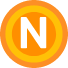
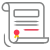
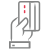
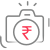
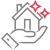
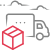
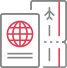
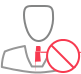
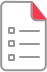
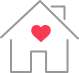
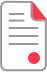
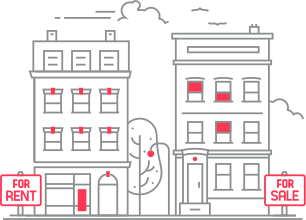
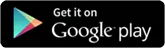

In [14]:
soup = BeautifulSoup(page.content)
soup